In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
#Importing the dataset

df_main=pd.read_csv("D:/Data Analysis/Clustering/RFM_MAIN.csv",index_col="Customer_ID")
df_BACKUP=pd.read_csv("D:/Data Analysis/Clustering/RFM_MAIN.csv",index_col="Customer_ID")

df=df_main
print(df.head())

             Recency  Freq  Monetary
Customer_ID                         
12747              2   103   4196.01
12748              0  4593  33211.53
12749              3   199   4090.88
12820              3    59    942.34
12821            214     6     92.72


In [88]:
df.describe()

,Recency,Freq,Monetary
count,3903.000000,3903.000000,3903.000000
mean,91.809634,90.575455,1635.229694
std,99.564749,218.087263,4637.962932
min,0.000000,1.000000,2.900000
25%,17.000000,17.000000,296.090000
50%,50.000000,41.000000,640.760000
75%,142.500000,100.000000,1543.135000
max,373.000000,7847.000000,134415.520000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 12747 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Recency   3903 non-null   int64  
 1   Freq      3903 non-null   int64  
 2   Monetary  3903 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 122.0 KB


# Normal K means Clustering you conducted on R

### Filtering out values with Monetary Greater than 10000

In [90]:
#df=df.loc[(df.Monetary<5000) & (df.Freq < 1000)]
print(df.describe())
print(df.head())

           Recency         Freq       Monetary
count  3903.000000  3903.000000    3903.000000
mean     91.809634    90.575455    1635.229694
std      99.564749   218.087263    4637.962932
min       0.000000     1.000000       2.900000
25%      17.000000    17.000000     296.090000
50%      50.000000    41.000000     640.760000
75%     142.500000   100.000000    1543.135000
max     373.000000  7847.000000  134415.520000
             Recency  Freq  Monetary
Customer_ID                         
12747              2   103   4196.01
12748              0  4593  33211.53
12749              3   199   4090.88
12820              3    59    942.34
12821            214     6     92.72


In [91]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [92]:
#Standardize the data
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

In [93]:
#Normalize the data
normal_df=normalize(scaled_df)
normal_df = pd.DataFrame(normal_df) 

In [94]:
normal_df.describe()

,0,1,2
count,3903.000000,3903.000000,3903.000000
mean,-0.216811,-0.142497,-0.148371
std,0.778895,0.422560,0.354504
min,-0.999977,-0.967478,-0.983370
25%,-0.885964,-0.422632,-0.375678
50%,-0.603640,-0.212571,-0.206062
75%,0.804613,0.055286,-0.026405
max,0.999878,0.989122,0.998614


### ELBOW CRITERION

In [95]:
sse={}
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,max_iter=1000).fit(normal_df)
    sse[i]=kmeans.inertia_

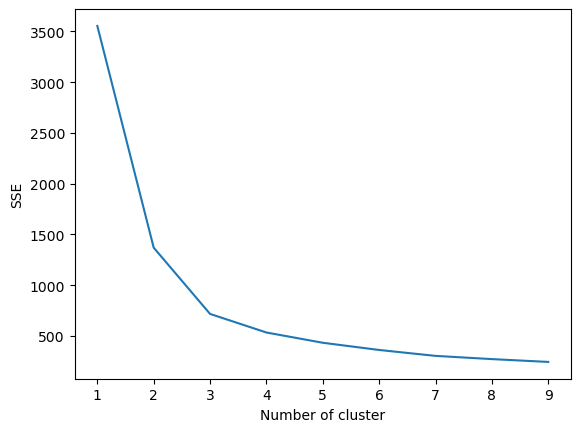

In [96]:
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

### Calculating the Sillhouette Scores

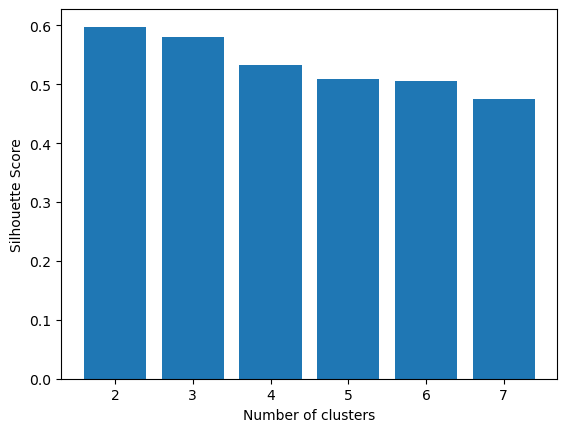

..............................................................
   Cluster  Silhoutte_Score
0        2         0.597634
1        3         0.580863
2        4         0.531950
3        5         0.508098
4        6         0.505068
5        7         0.475712


In [97]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normal_df, KMeans(n_clusters = n_cluster).fit_predict(normal_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 
print("..............................................................")
ss_df=pd.DataFrame({"Cluster":k,"Silhoutte_Score":silhouette_scores})
print(ss_df)

<class 'matplotlib.axes._subplots.Axes3DSubplot'>


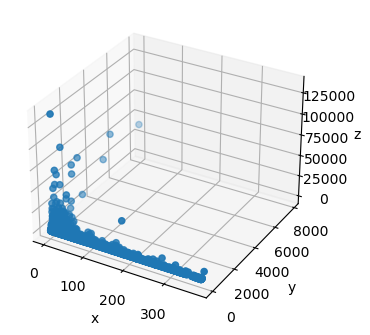

In [98]:
plt.figure(figsize = (5, 4))
plot_axes = plt.axes(projection = '3d')

print(type(plot_axes))
plot_axes.scatter3D(df.Recency, df.Freq, df.Monetary)

plot_axes.set_xlabel('x')
plot_axes.set_ylabel('y')
plot_axes.set_zlabel('z')
plt.show()

### Using Principal Component Analysis

In [102]:
from sklearn.decomposition import PCA

In [103]:
df_main.head()

,Recency,Freq,Monetary
Customer_ID,,,
12747,2,103,4196.01
12748,0,4593,33211.53
12749,3,199,4090.88
12820,3,59,942.34
12821,214,6,92.72


In [106]:
raw_df=df_main

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 

print(normalized_df.head())
print('..........................')
print(normalized_df.describe())

          0         1         2
0 -0.851669  0.053790  0.521313
1 -0.042380  0.948839  0.312903
2 -0.775449  0.432211  0.460297
3 -0.973862 -0.158075 -0.163110
4  0.923201 -0.291729 -0.250188
..........................
                 0            1            2
count  3903.000000  3903.000000  3903.000000
mean     -0.216811    -0.142497    -0.148371
std       0.778895     0.422560     0.354504
min      -0.999977    -0.967478    -0.983370
25%      -0.885964    -0.422632    -0.375678
50%      -0.603640    -0.212571    -0.206062
75%       0.804613     0.055286    -0.026405
max       0.999878     0.989122     0.998614


In [107]:
# Reducing the dimensions of the data 
pca = PCA(n_components = 3) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3'] 
  
X_principal.head(2)

,P1,P2,P3
0,-0.706614,0.464523,0.418287
1,-0.002132,1.158336,-0.304087
